### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta

## Load data

In [2]:
df = pd.read_csv('B:/My Works/Data Science/Grassroots/2021/tx_all_pub_20200125-20210102-all_time.csv', parse_dates = True)
df

B:\Conda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,timeset,transfer_subtype,transfer_use,source,s_comm_tkn,s_business_type,target,t_comm_tkn,t_business_type,tx_token,weight,type,token_name,token_address
0,1,2020-01-25 19:13:17.731529,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,NaN,NaN,0x245fc81fe385450Dc0f4787668e47c903C00b0A1,None,NaN,NaN,18000.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
1,2,2020-01-25 19:13:19.056070,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,NaN,NaN,0xC1697C1326fD192438515fE2F7E4cCb0C705C5d2,None,NaN,NaN,9047.660892,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
2,3,2020-01-25 19:13:20.288346,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,NaN,NaN,0xBAB77A20a757e8438DfaBF01D5F36DD12d862B31,None,NaN,NaN,25378.726002,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
3,4,2020-01-25 19:13:21.478850,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,NaN,NaN,0xD95954e3fCd2f09A6Be5931D24f731eFa63BF435,None,NaN,NaN,4495.932576,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
4,5,2020-01-26 07:48:43.042684,DISBURSEMENT,NaN,0xBDB3Bc887C3b70586BC25D04d89eC802b897fC5F,NaN,NaN,0x4AB73CfaC1732a9DcD74BdB4C9605f21832D7C72,None,NaN,NaN,400.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621923,721250,2021-01-01 21:15:29.937806,STANDARD,NaN,0x451F42E743A62577DfF07cb66Dde23EE2811FC85,NaN,NaN,0x20C4219DE4448AF5ccEc2CD60654EDbC24df31a3,None,NaN,NaN,400.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
621924,721251,2021-01-01 21:22:28.628809,STANDARD,NaN,0x451F42E743A62577DfF07cb66Dde23EE2811FC85,NaN,NaN,0x5A46B285d5da61516DFa5Cc3c9cC81BB6bD0c4E7,None,NaN,NaN,100.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
621925,721252,2021-01-02 04:19:37.932273,STANDARD,NaN,0x3498eb56d9ea038f6031586979Ca618f05F51aaC,NaN,NaN,0x6D119C5579CefEE29e222cA6cC007F4509D29E61,None,NaN,NaN,30.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4
621926,721253,2021-01-02 04:30:43.258939,STANDARD,NaN,0xf4e94AfA6340D8544Aebc30b6f5882905EC79c7f,NaN,NaN,0xDd001826421DA5B0dcFf3E652fE429103Fe6faA1,None,NaN,NaN,5000.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4


In [3]:
df['timeset'] = pd.to_datetime(df['timeset'])
print (df['timeset'].dtypes)

datetime64[ns]


In [4]:
df['trxn_month'] = df['timeset'].dt.month
df['trxn_week'] = df['timeset'].dt.week
df['trxn_day'] = df['timeset'].dt.day
df

,id,timeset,transfer_subtype,transfer_use,source,s_comm_tkn,s_business_type,target,t_comm_tkn,t_business_type,tx_token,weight,type,token_name,token_address,trxn_month,trxn_week,trxn_day
0,1,2020-01-25 19:13:17.731529,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,NaN,NaN,0x245fc81fe385450Dc0f4787668e47c903C00b0A1,None,NaN,NaN,18000.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,4,25
1,2,2020-01-25 19:13:19.056070,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,NaN,NaN,0xC1697C1326fD192438515fE2F7E4cCb0C705C5d2,None,NaN,NaN,9047.660892,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,4,25
2,3,2020-01-25 19:13:20.288346,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,NaN,NaN,0xBAB77A20a757e8438DfaBF01D5F36DD12d862B31,None,NaN,NaN,25378.726002,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,4,25
3,4,2020-01-25 19:13:21.478850,DISBURSEMENT,NaN,0xEDA5C9B75Fdb3B9bdAB987A704632280Cf93084F,NaN,NaN,0xD95954e3fCd2f09A6Be5931D24f731eFa63BF435,None,NaN,NaN,4495.932576,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,4,25
4,5,2020-01-26 07:48:43.042684,DISBURSEMENT,NaN,0xBDB3Bc887C3b70586BC25D04d89eC802b897fC5F,NaN,NaN,0x4AB73CfaC1732a9DcD74BdB4C9605f21832D7C72,None,NaN,NaN,400.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621923,721250,2021-01-01 21:15:29.937806,STANDARD,NaN,0x451F42E743A62577DfF07cb66Dde23EE2811FC85,NaN,NaN,0x20C4219DE4448AF5ccEc2CD60654EDbC24df31a3,None,NaN,NaN,400.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,53,1
621924,721251,2021-01-01 21:22:28.628809,STANDARD,NaN,0x451F42E743A62577DfF07cb66Dde23EE2811FC85,NaN,NaN,0x5A46B285d5da61516DFa5Cc3c9cC81BB6bD0c4E7,None,NaN,NaN,100.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,53,1
621925,721252,2021-01-02 04:19:37.932273,STANDARD,NaN,0x3498eb56d9ea038f6031586979Ca618f05F51aaC,NaN,NaN,0x6D119C5579CefEE29e222cA6cC007F4509D29E61,None,NaN,NaN,30.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,53,2
621926,721253,2021-01-02 04:30:43.258939,STANDARD,NaN,0xf4e94AfA6340D8544Aebc30b6f5882905EC79c7f,NaN,NaN,0xDd001826421DA5B0dcFf3E652fE429103Fe6faA1,None,NaN,NaN,5000.000000,directed,Sarafu,0x0Fd6e8F2320C90e9D4b3A5bd888c4D556d20AbD4,1,53,2


In [5]:
df['trxn_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

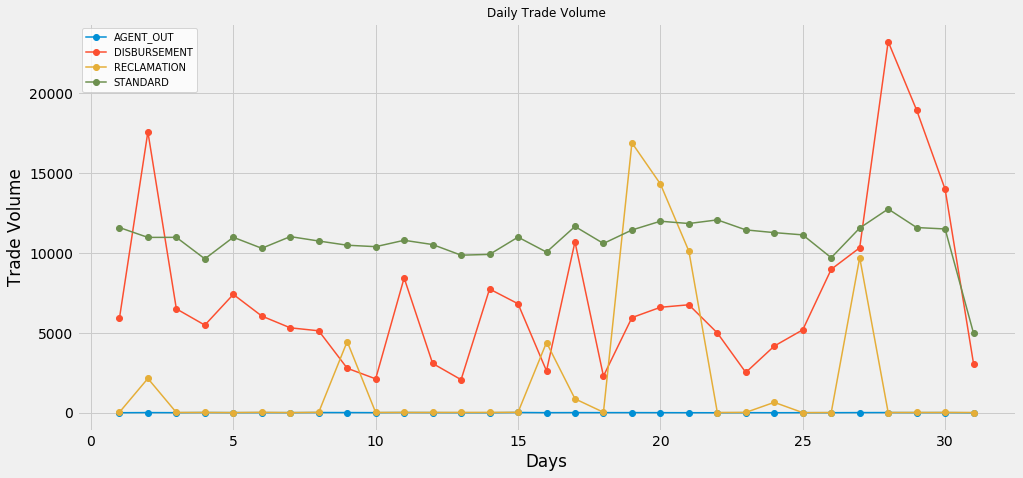

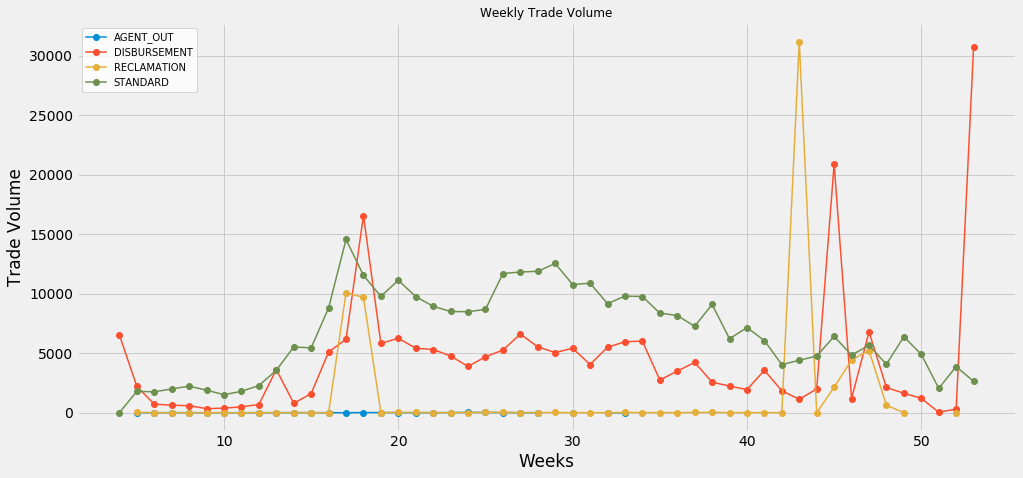

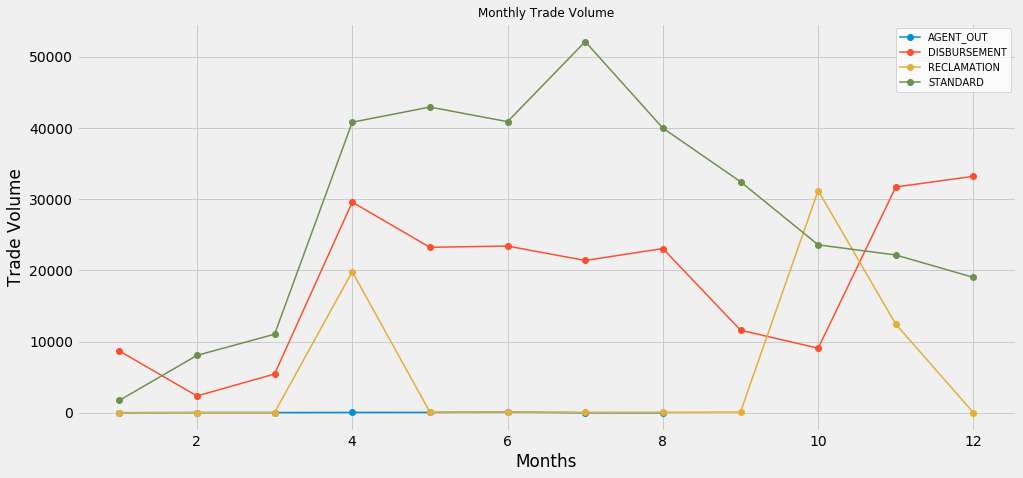

In [6]:
with plt.style.context('fivethirtyeight'):
    
    fig, ax = plt.subplots(figsize=(15,7))
ax.legend

ax.plot((df.groupby(['trxn_day','transfer_subtype']).count()['weight'].unstack()),marker = 'o')
ax.set(title = 'Daily Trade Volume',
     xlabel = 'Days',
    ylabel = 'Trade Volume')
plt.legend(df.groupby(['trxn_day','transfer_subtype']).count()['weight'].unstack())


with plt.style.context('fivethirtyeight'):
    fig, ax1 = plt.subplots(figsize=(15,7))
ax1.legend

ax1.plot((df.groupby(['trxn_week','transfer_subtype']).count()['weight'].unstack()),marker = 'o')
ax1.set(title = 'Weekly Trade Volume',
     xlabel = 'Weeks',
    ylabel = 'Trade Volume')
plt.legend(df.groupby(['trxn_day','transfer_subtype']).count()['weight'].unstack())
plt.savefig('Weekly_Trade_vol.jpg')

with plt.style.context('fivethirtyeight'):
    
    fig, ax2 = plt.subplots(figsize=(15,7))

ax2.plot((df.groupby(['trxn_month','transfer_subtype']).count()['weight'].unstack()),marker = 'o')
ax2.set(title = 'Monthly Trade Volume',
     xlabel = 'Months',
    ylabel = 'Trade Volume')
plt.legend(df.groupby(['trxn_day','transfer_subtype']).count()['weight'].unstack())
plt.show()
